In [15]:
from PurifyPixels.eliminate import model
from PurifyPixels.eliminate.dataset import EliDataset
from torch.utils.data import DataLoader
import torch
import cv2

import matplotlib.pyplot as plt

In [3]:
fpath = '/home/ching/project/PurifyData/encoded_img/00018_encoded.png'

In [4]:
ds = EliDataset([fpath])

In [5]:
dataloader = DataLoader(ds,
                    batch_size=4,
                    shuffle=True,
                    num_workers=6,
                    pin_memory=True,
                    drop_last=False,
                    persistent_workers=True)

In [6]:
generator = model.Generator()

In [9]:
device = torch.device("cuda", 0)

In [11]:
generator = generator.to(device=device, memory_format=torch.channels_last)


In [12]:
inp, fpath = next(iter(dataloader))

In [18]:
out = generator(inp.cuda())

/home/ching/miniconda3/envs/tenv/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


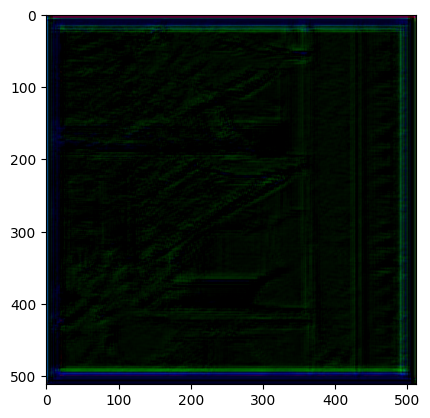

In [23]:
plt.imshow(out.detach().cpu().squeeze(0).permute(1,2,0).numpy())